# Flowers and colors in Katherine Mansfield's _The Garden Party and Other Stories_


### Notebook outline
- Introduction 
    - Victorian floriography and Mansfield's use of plant symbolism 
    - Impressionist visual art and Mansfield's use of color 
    - Driving question 
- Overview
    - WordNet's flaws
- Code 
    - Importing, splitting, cleaning, and organizing 
    - Tokenizing, stemming, lemmatizing, and POS-tagging
    - Flowers and colors from WordNet
    - Scraping flowers and their meanings from Wikipedia
- Analysis 
    - Identifying flowers 
    - Comparing flowers across stories 
    - Identifying colors 
    - Comparing colors across stories
- Figures and context
    - Figure 1. Plant dispersion plots 
    - Plant concordances
    - Figure 2. Color dispersion plots 
    - Color concordances
- Conclusion
- Works Cited

# Introduction
> _...but I tell you, my lord fool, out of this nettle, danger, we pluck this flower, safety._
<div style="text-align: right"> William Shakespeare, <em>Henry IV</em>, as engraved on Katherine Mansfield's headstone </div>  
  
Katherine Mansfield was a literary Modernist born in New Zealand in October of 1888. She emigrated to London in 1907, where she was contemporaries with other prominent Modernists such as Virginia Woolf and D.H. Lawrence. Despite her close connections with her more long-lived and  historically prominent peers, Mansfield has only recently been hailed by scholars as an influential originator of literary Modernism. This recent interest has unearthed a multitude of primary sources on Mansfield’s life and perspectives, including five volumes of her letters and several of her diaries and notebooks (Encyclopedia Britannica, _Katherine Mansfield_ ). These sources have shed new light on Mansfield’s wide-ranging artistic influences, of which this project aims to study two -- Victorian floriography (Saker) and Impressionist visual art.  

## Victorian floriography and Mansfield’s use of plant symbolism 
Meaning has been assigned to flowers for thousands of years, in works from the Old Testament to Shakespeare's plays. Even though the meanings of flowers vary across context -- for example, even among Shakespeare's works, roses have used to represent foreboding in _Hamlet_ , allegiance to rival noble houses in _Henry VI_ , and romantic love or marriage in _A Midsummer's Night Dream_ -- Western authors throughout history have settled in relative agreement on the meanings of many common blooms.  

The standardization of flower meanings in everyday life and literature alike began in earnest during the 18th century and reached its height in the Victorian era (1837-1901) due to the popularization of floriography, the communication through the use and arrangement of flowers. Effective floriography required floral dictionaries that were widely published and read and ultimately standardized and codified plant symbolism.  

Modernist authors distanced themselves from their Victorian predecessors by representing characters through their shifting thoughts, sensations, and memories. Even so, Mansfield did not entirely reject all Victorian customs -- flower symbolism was commonly referenced in Mansfield's works, many of which grappled with the Victorian feminine ideal: Floriography was especially popular among women, and Mansfield often used the covert and romantic nature of floriographic communication to hint at her characters’ internal turmoil. In a 1917 letter to Lady Ottoline Morrell, Mansfield wrote, "Who is going to write about a flower garden?  It might be so wonderful -- do you see how I mean? There would be people walking in the garden \[...\] a kind of, musically speaking -- conversation set to flowers" (Saker). 

## Impressionist visual art and Mansfield’s use of color
Although Mansfield’s use of plant symbolism connected her works not only to Western literary canon but also the social mores of the day, her use of color marked a complete departure from existing literary and social movements. In particular, Mansfield (and other Modernists) focused on their characters’ complex internal lives rather than on any detailed account or even interpretation of the world around them.  

Mansfield admired Impressionist art; in letters she declared Van Gogh's paintings as "\[teaching\] me something about writing which was queer -- a kind of freedom -- or rather, a shaking free" (Forward). She understood the central parallels between the two artistic movements -- both aimed to capture reality not in hyperrealistic detail, but rather in spirit and in feeling. (If anything, literary Modernists were extremely selective in sharing details.) This cross-medium influence is visible in her fascination with capturing recurring but fleeting images in her works: Mirrors in "The Young Girl", gentlemens' canes in "Daughters of the Late Colonel", and most prominently in _The Garden Party and Other Stories_, the flora of both New Zealand and England.  

Given Mansfield’s conception of writing as almost a visual medium, I study her use of color, a literary technique that pretty much effortlessly translates from visual art to prose. Much like flowers and plants, Mansfield treated colors not just as concrete descriptors, but also emotional hints that relied on each color’s socially prescribed connotation. 

## Driving question 

How did two of Mansfield’s influences -- Victorian floriography and Impressionist visual art --  present themselves in her use of plant symbolism and color imagery? How did she use the connotations behind plants and colors to add meaning to her works? Finally, were there any larger trends regarding the use of plants and colors throughout _The Garden Party and Other Stories_.

Note that I focus on the Mansfield stories that we have read in class, and that citations, if not explicitly given, all refer to _The Garden Party and Other Stories_.

 

# Overview 

In this project, I use computational literary techniques to assist in the location, aggregation, and visualization of Mansfield’s uses of plants and colors in _The Garden Party and Other Stories_.   

In summary, I use WordNet to locate all tokens whose lemmas have flower hypernyms in each story. From observation, this method is inadequate for identifying all tokens that refer to plants, so I also locate all tokens that appear in this Wikipedia page on plant symbolism. (I could not find a digitized Victorian flower dictionary -- the first-best situation -- but flower meanings have remained largely constant since they were codified in the Victorian era, and Wikipedia is the most accessible and cleanly digitized source I was able to locate.)  

Using NLTK concordances, I investigate all the identified plants in their surrounding contexts and refer to the Wikipedia plants for their commonly-accepted meanings.  

Finally, I create dispersion plots in matplotlib to visually track the mentions of these plants throughout texts. 

For colors, I repeat the same process, except the WordNet color-identification process is much more accurate, and I don’t scrape Wikipedia for color-meanings (there are far fewer colors, and knowledge of their meanings is much more commonly referenced). 

# Code 

## Importing, splitting, cleaning, organizing _TGPAOS_

Does what the label says. 

In [1]:
# libraries 

# data cleaning/analysis
import numpy as np 
import pandas as pd
import re 
from itertools import chain # help unnesting iterables
from collections import Counter

# scraping/reading input
import json
import requests
from bs4 import BeautifulSoup

# nlp
import nltk 
from nltk.corpus import wordnet as wn

# graphing
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors # a list of all possible mpl colors
import string # to get a list of  letters for labeling figures

In [2]:
# importing data from db corpus

# grabbing metadata for corpus
metadata = "http://corpus-db.org/api/id/1429.0"
response = requests.get(metadata)

data = json.loads(response.text)

# grabbing fulltext 
fulltext = "http://corpus-db.org/api/id/1429.0/fulltext"
response2 = requests.get(fulltext)

# the garden party 
gp = json.loads(response2.text)

# grabbing a raw string out 
text = gp[0].get("text")

# splitting into stories 
stories = re.split(r"\n\n\n\n[0-9]{1,2}\.\s(?=[A-Z])", text)
len(stories) # where the first story is the toc 

16

In [3]:
# making tgpaos easier to work with 

# create a dict of stories, where
# key is title 
# value is raw text (one long string)
stories_d = {}

for story in stories[1:]:
    # grab the title to be the key 
    split = re.split(r"\n\n", story, maxsplit = 1)
    title = split[0][:-1]
    title = " ".join([i.lower() for i in title.split()])
    
    # keeping story as raw text
    story = split[-1]
        
    stories_d[title] = story

In [4]:
# a list of stories we actually read
read = ["the garden party", "the daughters of the late colonel", "the young girl", "marriage a la mode", "her first ball",
       "an ideal family"]

In [5]:
# getting a pretty list of stories
toc = stories[0]
toc = re.split(r"\n\n[0-9]{1,2}\.\s", toc)
toc = toc[1:] # drop the header

# turning it into a dict for easier indexing 
toc_d = {}
for t in toc:
    lowercase = " ".join([w.lower() for w in t.split()])
    toc_d[lowercase] = t

In [6]:
# turning the matplotlib colors into a list of color names as strings
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
mpl_colors = [name for hsv, name in by_hsv]

## Tokenizing, stemming, lemmatizing, and POS-tagging _TGPAOS_

This project is essentially done through a series of dictionaries (of raw text, of tokens, of lemmas, etc.), each indexed on the lowercased titles of each short story. 

In [7]:
# init stem/lem
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.LancasterStemmer()

In [8]:
# creating dicts of tokens, lemmas, pos, and nouns for each story 
tokens_d = {}
lemmas_d = {} # all lemmas in a story 
pos_d = {} # pos-tagged tokens in a story 
nouns_d = {} # all unique nouns in a story 

for k,v in stories_d.items(): 
    # k is the story's title 
    # v is tokens of story 
    title = k
    text = v
    
    # removing punctuation from story 
    translator = text.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    text = text.translate(translator)
    tokens = nltk.word_tokenize(text)
    tokens_d[title] = tokens
    
    lemmas_d[title] = [lemmatizer.lemmatize(t) for t in tokens]
    
    pos = nltk.pos_tag(tokens)
    pos_d[title] = pos
    
    nouns_d[title] = list(set([w for w,p in pos if p == 'NN' or p == "NNS"]))


## Flowers and colors from WordNet
I write some functions that make using WordNet with tokens easier. Some functions return easy-to-parse flat lists of all WordNet hypernyms and others identify if a given list of hypernyms includes a plant or color hypernym. 




In [9]:
# creating some helper functions 

def getHyponym(word): 
    return word.hyponyms()

def getHypernym(word): 
    return word.hypernyms()

def linked_hypernyms(word):
    # takes a word 
    # returns all hypernyms as linked NOT flat list
    synsets = wn.synsets(word)
    
    if len(synsets) > 0: 
        synset = synsets[0]
        linked_list = synset.tree(getHypernym) 
        if len(linked_list) == 1:
            linked_list = [linked_list[0]]
            
        return(linked_list)

def flat_hypernyms(word):
    # takes a word 
    # returns all hypernyms as flat NOT list
    nested_list = linked_hypernyms(word)
    output = []
    def flatten_list(l): 
        for i in l: 
            if type(i) == list: 
                flatten_list(i) 
            else: 
                output.append(i)
    try:        
        flatten_list(nested_list)
        return_me = list(set(output))
   # return output
        return return_me
    except TypeError:
        return 
 

In [10]:
# more helper functions 

def is_plant(word):
    
    # takes a word 
    # checks is its hypernyms to see if that word is a plant 
    # returns T/F
    
    list_hypernyms = flat_hypernyms(word) # gets all hypernyms as flat list 
    is_plant = False
    if list_hypernyms is not None:
        for hypernym in list_hypernyms: 
            if hypernym == wn.synset('plant.n.02'):
                is_plant = True
    return is_plant

def is_flower(word):
    
    # takes a word 
    # checks is its hypernyms to see if that word is a flower
    # returns T/F
    
    list_hypernyms = flat_hypernyms(word) # gets all hypernyms as flat list 
    is_flower = False
    if list_hypernyms is not None:
        for hypernym in list_hypernyms: 
            if hypernym == wn.synset('flower.n.01'):
                is_flower = True
    return is_flower


def is_color(word):
    # takes a word 
    # checks is its hypernyms to see if that word is a color
    # returns T/F
    
    list_hypernyms = flat_hypernyms(word) # gets all hypernyms as flat list 
    is_color = False
    if list_hypernyms is not None:
        for hypernym in list_hypernyms: 
            if hypernym == wn.synset('color.n.01'):
                is_color = True
    return is_color 

### Demonstration of my functions 
Here are some quick demonstrations of these functions work. Below are function that return all the hypernyms of a certain string. 

In [11]:
linked_hypernyms("wife") 
# return all hypernyms of wife as a deep list (i.e., how WordNet "thinks" of categories)

[Synset('wife.n.01'),
 [Synset('spouse.n.01'),
  [Synset('domestic_partner.n.01'),
   [Synset('person.n.01'),
    [Synset('causal_agent.n.01'),
     [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]],
    [Synset('organism.n.01'),
     [Synset('living_thing.n.01'),
      [Synset('whole.n.02'),
       [Synset('object.n.01'),
        [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]]]]],
  [Synset('relative.n.01'),
   [Synset('person.n.01'),
    [Synset('causal_agent.n.01'),
     [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]],
    [Synset('organism.n.01'),
     [Synset('living_thing.n.01'),
      [Synset('whole.n.02'),
       [Synset('object.n.01'),
        [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]]]]]],
 [Synset('woman.n.01'),
  [Synset('adult.n.01'),
   [Synset('person.n.01'),
    [Synset('causal_agent.n.01'),
     [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]],
    [Synset('organism.n.01'),
     [Synset('living_thing.n.01'),


In [12]:
flat_hypernyms("wife")
# return all unique hypernyms of wife as a flat list

[Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('wife.n.01'),
 Synset('adult.n.01'),
 Synset('spouse.n.01'),
 Synset('causal_agent.n.01'),
 Synset('person.n.01'),
 Synset('domestic_partner.n.01'),
 Synset('living_thing.n.01'),
 Synset('relative.n.01'),
 Synset('woman.n.01'),
 Synset('female.n.02'),
 Synset('entity.n.01'),
 Synset('organism.n.01')]

Below is a demonstration of how my plant- or color-identifier function works.

In [13]:
list(set([n for n in tokens_d.get("the garden party") if is_color(n)] ))
# return all words in "the garden party" if color is a hypernym

['black', 'red', 'pink', 'crimson', 'brown', 'blue', 'green', 'yellow']

### Demonstration of WordNet's flaws
Here is an illustrative example for why WordNet is not perfect at processing which tokens are plants or colors, and why I found it necessarily to additional consult Wikipedia. 

In [14]:
flat_hypernyms("daisy")
# where flat_hypernyms is a fn that takes a string word and 
# returns a flat, not nested list of the input word's hypernyms

[Synset('plant.n.02'),
 Synset('physical_entity.n.01'),
 Synset('flower.n.01'),
 Synset('vascular_plant.n.01'),
 Synset('angiosperm.n.01'),
 Synset('spermatophyte.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('living_thing.n.01'),
 Synset('entity.n.01'),
 Synset('daisy.n.01'),
 Synset('organism.n.01')]

Note here that for the word "daisy," WordNet works well. It correctly identifies a daisy as being an flower, then an angiosperm, then a spermatophyte, then a vascular plant, then a plant. 

In [15]:
flat_hypernyms("lavender")

[Synset('plant.n.02'),
 Synset('physical_entity.n.01'),
 Synset('vascular_plant.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('lavender.n.01'),
 Synset('shrub.n.01'),
 Synset('living_thing.n.01'),
 Synset('woody_plant.n.01'),
 Synset('entity.n.01'),
 Synset('organism.n.01')]

In contrast, WordNet does not identify "lavender" as being either a flower or a color. 

To circumvent the flower identification problem, I choose the key hypernym for "flower"-identification to be `"Synset('plant.n.02')`, which both "daisy" and "lavender" share. Of course, this overidentifies tokens, since non-specific tokens that Mansfield uses such as "flower," "tree," and "bush" are also classified as plants and thus included. These and other mis-identified tokens are removed manually.  

As for the color identification problem, a close reading of _The Garden Party_ did not reveal any colors that were not either identified by WordNet or also the names of plants (e.g., "rose", "lavender"), so I determined the use of WordNet alone to be satisfactory. 

## Scraping more flowers and their meanings from Wikipedia

As mentioned above in the Approach section, WordNet is far from perfect from identifying all tokens that refer to plants. To get a more exhaustive list of plant names and their meanings, I scrape this Wikipedia page (https://en.wikipedia.org/wiki/Plant_symbolism).

In [16]:
# scraping flowers table off wikipedia
url = "https://en.wikipedia.org/wiki/Plant_symbolism"
output = requests.get(url)
soup = BeautifulSoup(output.text,"html.parser")
table = soup.find_all('table')
table_rows = table[2].find_all('tr')
flowers = []
flower_meaning = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    flowers.append(row)
    flower_meaning.append((tr, row))

In [17]:
flowers = flowers[2:]
flower_names = [f[0].strip().lower() for f in flowers if len(f) >= 1 and re.search(r"^[A-Z]", f[0])]
flower_names[20:30] # here's a portion of a big big list of flowers in alphabetical order

["baby's breath",
 "bachelor's button",
 'balm',
 'balsam',
 'balsamine',
 'basil',
 'bay wreath',
 'begonia',
 'bellflower',
 'bells of ireland']

In [18]:
flower_tokens = [lemmatizer.lemmatize(token) for token in flower_names]

# Analysis and figures

## Identifying flowers

Here, I identify all tokens that are plants as identified by WordNet or flowers as matched by flowers on the Wikipedia page. In the Wikipedia case, I check the lemma of the token against the lemma of the flower name on Wikipedia to ensure that all forms of the flower's name in the text are matched (i.e., I want instances of "daisies" just as much as I want instances of "daisy").

There are two issues with this approach:  

First, as mentioned above, WordNet over-identifies non-specific plants. Additionally, there are tokens with unavoidably ambiguous meanings. Take, for instance, the word "hops", which appears in _The Garden Party and Other Stories_. Reviewing the token in context reveals that "hops" refers to jumping up and down, but WordNet's list of hypernyms includes "hops" as a plant, since it's also the name of the vine that helps flavor beer. "Poke" the verb becomes "pokeweed" in WordNet, "glad" the adjective becomes "gladiolus in Wordnet.  

Secondly, using Wikipedia flowers raises a new set of issues, especially because the list of flowers from Wikipedia is quite extensive (185 flowers), which leads to a greater chance of ambiguous lemma matches. For instance, "broom" flowers are listed on Wikipedia as symbolizing "humility," but Mansfield uses the word to reference the household object. 

I didn't see any way around these pathological cases other than to manually remove them. 

In [19]:
# so-called "plants"
false_plants = ["box", "weed", "hop", "poke", "broom", "trumpet", "cheat", "glad", "benny", "flower", "grass", "tree", 
                "sang", "simple", "bush", "straw"]

In [20]:
# grabbing all tokens that are plants from wordnet or flowers from wikipedia
plants_d = {}

for title in stories_d.keys():
    
    text = stories_d.get(title)
    #print(title)
    tokens = nltk.word_tokenize(text.lower())
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]

    # something is a flower off wikipedia if its lemma is in the wikipedia flower lemma  
    flowers_wiki = list(set([tokens[n] for n in np.arange(len(tokens)) if lemmas[n] in flower_tokens]))
    # something is a plant if it has plant as a hypernym 
    plants_wn = list(set([n for n in tokens_d.get(title) if is_plant(n)]))
    # all unique instances of wikipedia flowers and plants off wn are plant tokens
    plants = list(set(flowers_wiki + plants_wn))
    plants = [i.lower() for i in plants]
    #print(plants)
    
    # ordering the plant tokens in order of first appearance 
    plant_indices = []
    # collecting index/location in text of first appearance
    for p in plants: 
        if p in tokens: 
            index = tokens.index(p)
            plant_indices.append([p, index])
    # ordering by first first appearance to latest first appearance
    plants_ordered = sorted(plant_indices, key = lambda pair: pair[-1])
    # storing the ordered arguments 
    plants_d[title] = [q[0] for q in plants_ordered]
    
    #print("\n")


In [21]:
# removing false plants from plants_dict (has all plant tokens in a story)
# and creating a dict of unique plant lemmas in a story
plant_lemmas_d = {}
    
for title,list_of_plants in plants_d.items():
    plants = []
    plant_lemmas = []
    for p in list_of_plants: 
        p_lemma = lemmatizer.lemmatize(p)
        if p_lemma not in false_plants:
            plants.append(p)
            plant_lemmas.append(p_lemma)
    # assigning dict values 
    plants_d[title] = plants
    plant_lemmas_d[title] = plant_lemmas

In [22]:
# just double-checking my work 
all_plants_lemmas = list(set(list(chain.from_iterable(plant_lemmas_d.values()))))
all_plants = list(set(list(chain.from_iterable(plants_d.values()))))

In [23]:
# here are all the unique plant tokens in tgpaos
all_plants_lemmas

['apricot',
 'basil',
 'holly',
 'lilac',
 'maize',
 'almond',
 'chrysanthemum',
 'gooseberry',
 'tangerine',
 'anemone',
 'cabbage',
 'hydrangea',
 'fuchsia',
 'peach',
 'convolvulus',
 'willow',
 'canna',
 'hyacinth',
 'hollyhock',
 'rose',
 'carnation',
 'pansy',
 'daisy',
 'arum',
 'nasturtium',
 'syringa',
 'sloe',
 'lavender',
 'pineapple',
 'petunia',
 'azalea',
 'daffodil',
 'tuberose',
 'chestnut',
 'violet',
 'ginger',
 'caper',
 'fern',
 'poppy',
 'marigold',
 'olive',
 'lily',
 'briar',
 'banana']

## Comparing flowers across stories 

Here I simply create a pandas dataframe with some basic observations about each story and which types and how many of each flower are mentioned

In [24]:
Counter(plant_lemmas_d.get("at the bay"))

Counter({'marigold': 2,
         'fuchsia': 2,
         'nasturtium': 2,
         'caper': 1,
         'lilac': 1,
         'rose': 1,
         'ginger': 1,
         'convolvulus': 1,
         'anemone': 1,
         'poppy': 1,
         'apricot': 1,
         'gooseberry': 1,
         'carnation': 1,
         'peach': 1})

In [25]:
# initializing a dataframe
plants_df = pd.DataFrame(stories_d.keys(), columns = ["title"])

# init columns 
for c in ["n_tokens", "n_types", "n_plants", "n_mentions" ]:
    plants_df[c] = 0

# init columns 
for c in all_plants_lemmas: 
    plants_df[c] = 0

In [26]:
# filling columns: 
for i in plants_df.index:
    title = plants_df.loc[i, "title"]
    tokens = tokens_d.get(title)
    lemmas = lemmas_d.get(title)
    
    # type and token
    plants_df.loc[i, ["n_tokens"]] = len(tokens)
    plants_df.loc[i, ["n_types"]] = len(list(set(list(tokens))))
    
    # filling the plant columns
    plant_lemmas = plant_lemmas_d.get(title)
    # how many plants lemmas do you find in a text 
    plant_mentions = []
    for x in np.arange(len(lemmas)):
        for y in np.arange(len(plant_lemmas)):
            if lemmas[x] == plant_lemmas[y]:
                plant_mentions.append(plant_lemmas[y])
                #print(plant_lemmas[y])
        
    
    counter = Counter(plant_mentions) 
    # Counter dict of plant lemmas and how many times they appear in each story
    n_plants = 0
    # how many types of plants are mentioned
    n_mentions = 0
    # how many plant mentions there are 
    for col in all_plants_lemmas:
        count = counter.get(col)
        if count is not None: 
            plants_df.loc[i, [col]] = count
            n_plants += 1
            n_mentions += count
    plants_df.loc[i, "n_plants"] = n_plants
    plants_df.loc[i, "n_mentions"] = n_mentions

In [27]:
plants

['pansies', 'holly', 'lilies', 'daffodils']

In [28]:
pdf = plants_df # for simplicity of manipulation
pdf_r = pdf.loc[pdf.title.isin(read), ] # only the stories we've read
pdf_r.loc[:, (pdf_r != 0).any(axis=0)]
# print stories we have read and plant columns that are mentioned at least once in one of those stories

,title,n_tokens,n_types,n_plants,n_mentions,tangerine,cabbage,hydrangea,canna,hyacinth,...,sloe,lavender,pineapple,petunia,azalea,tuberose,chestnut,ginger,olive,lily
1,the garden party,5564,1377,8,25,0,1,0,2,0,...,0,2,0,0,0,0,0,0,2,10
2,the daughters of the late colonel,7283,1529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,the young girl,2275,762,5,9,2,0,0,0,0,...,0,0,1,0,0,0,1,3,0,0
6,marriage a la mode,3921,1162,5,16,0,0,0,0,0,...,1,0,6,2,0,0,0,0,0,0
9,her first ball,2631,865,3,5,0,0,0,0,0,...,0,0,0,0,3,1,0,0,0,0
13,an ideal family,2521,847,3,3,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
pdf.shape

(15, 49)

In [30]:
pdf_r.loc[:, (pdf_r != 0).any(axis=0)].shape

(6, 24)

## Identifying colors 

Same spirit as identifying flowers, except for there's no Wikipedia component. I lemmatize once again, and weirdly enough, "blackness" and "whiteness" do not lemmatize to their respective colors. 

In [31]:
colors_d = {}
color_lemmas_d = {}

for s in stories_d.keys():
    title = s
    story = stories_d.get(s)
    tokens = tokens_d.get(s)
    tokens = [t.lower() for t in tokens]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    
    # grabbing all tokens that have a plant hypernym 
    colors = []
    for i in np.arange(len(tokens)):
        token = tokens[i]
        if is_color(token):
            colors.append(token)
    colors = [t for t in tokens if is_color(t)]
    
    
    # ordering those colors in order of first appearance 
    color_indices = []
    # collecting index/location in text of first appearance, removing tokens that have lemma
    for c in colors: 
        index = tokens.index(c)
        color_indices.append([c, index])
    # ordering by first first appearance to latest first appearance
    colors_ordered = sorted(color_indices, key = lambda pair: pair[-1])
    # storing the ordered arguments 
    
    colors_d[title] = [q[0] for q in colors_ordered]
    color_lemmas_d[title] = [lemmatizer.lemmatize(i) for i in colors_d.get(title)]
    

In [32]:
# unnesting all unique color-tokens
all_colors_tokens = list(set(list(chain.from_iterable(colors_d.values()))))

# and getting all unique colors 
all_colors = []
for c in all_colors_tokens:
    all_colors.append(lemmatizer.lemmatize(c))
    
# all colors that appear in TGPAOS
all_colors

['black',
 'blackness',
 'whiteness',
 'red',
 'pink',
 'pink',
 'crimson',
 'brown',
 'blue',
 'purple',
 'scarlet',
 'amber',
 'green',
 'coral',
 'yellow']

In [33]:
len(all_colors)

15

## Comparing colors across stories 
Creating a pandas dataframe with the same structure as the resulting dataframe from the section titled "Comparing flowers across stories." 

In [34]:
# init a dataframe of color statistics
colors_df = pd.DataFrame(stories_d.keys(), columns = ["title"])

# create n_tokens, n_types 
colors_df["n_tokens"], colors_df["n_types"] = 0,0

# init total num_mentions, n_colors
colors_df["n_mentions"], colors_df["n_colors"] = 0,0

# init count columns
for c in all_colors:
    colors_df[c] = 0

In [35]:
# filling the count columns 
for i in colors_df.index:
    title = colors_df.loc[i, "title"]
    colors = colors_d.get(title)
    
    # finding type, tokens 
    colors_df.loc[i, "n_tokens"] = len(tokens_d.get(title))
    colors_df.loc[i, "n_types"] =len(list(set(list(tokens_d.get(title)))))
    
    # finding counts, mentions, colors
    counter = Counter(colors)
    n_mentions = 0
    n_colors = 0
    for j in all_colors: 
        count = counter.get(j)
        if count is None:
            count = 0
        colors_df.loc[i, j] = count
    colors_df.loc[i, "n_mentions"] = len(colors)
    colors_df.loc[i, "n_colors"] = len(list(set(colors)))

In [36]:
cdf = colors_df # for simplicity of manipulation
cdf_r = cdf.loc[cdf.title.isin(read)] # stories we've read 
cdf_r.loc[:, (cdf_r != 0).any(axis=0)] # show nonzero columns only

,title,n_tokens,n_types,n_mentions,n_colors,black,blackness,whiteness,red,pink,crimson,brown,blue,purple,scarlet,amber,green,yellow
1,the garden party,5564,1377,16,8,3,0,0,1,2,1,1,2,0,0,0,5,1
2,the daughters of the late colonel,7283,1529,24,10,10,1,1,4,0,0,1,1,3,1,0,1,1
4,the young girl,2275,762,15,6,4,0,0,0,3,1,0,5,1,0,0,1,0
6,marriage a la mode,3921,1162,15,6,3,0,0,3,2,0,0,2,0,0,0,2,3
9,her first ball,2631,865,12,5,3,0,0,1,6,0,1,0,0,0,1,0,0
13,an ideal family,2521,847,4,4,0,0,0,1,0,1,0,1,0,0,0,0,1


In [37]:
cdf.shape

(15, 19)

In [38]:
cdf_r.loc[:, (cdf_r != 0).any(axis=0)].shape

(6, 18)

# Figures and context
I build dispersion plots to track the mentions of plants and colors through texts. Here, I use matplotlib instead of NLTK's built-in plotter for additional customizability.  

Additionally, I use NLTK concordances to find the text surrounding each plant- or color-mention. 



## Figure 1. Plant dispersion plots

In [39]:
# A FUNCTION THAT GRAPHS DISPERSION PLOTS FOR COLORS 
def plant_dispersion_plot(title, fig_num):
    # title is the sthort story to graph 
    # returns a dispersion plot of colors
    
    %matplotlib inline
    
    story = stories_d.get(title)
    tokens = tokens_d.get(title)
    lemmas = lemmas_d.get(title)
    lemmas = [l.lower() for l in lemmas]
    text = nltk.Text(lemmas)
    
    
    # unique color-tokens that appear in story 
    plants_t = list(set(list(plants_d.get(title))))
    #print(plants_t)
    # unique plant-lemmas that appear in story 
    plants_l = []
    for p in plants_t:
        plants_l.append(lemmatizer.lemmatize(p))
    # remove all plant-tokens that we don't want bc they aren't specific enough or lemmatized wrong
    plants_l = list(set(list([p for p in plants_l if p not in false_plants])))
    #print(plants_l)
    
    # creating graph 
    # creating points to mark 
    points = [(x,y) for x in np.arange(len(lemmas)) 
              for y in np.arange(len(plants_l)) if lemmas[x] == plants_l[y]]
    if points:
        x,y = zip(*points)
    else: 
        x = y= ()
    
#     for i in np.arange(len(x)):
#         plt.scatter([x[i]], [y[i]], "|", c = "blue")
    plt.plot(x, y, "|", scalex=.1, color = "blue")
    plt.yticks(range(len(plants_l)), plants_l, color="black")
    plt.ylim(-1, len(plants_l))
    plt.xlim(0, len(tokens))
    
    #title 
    print_title = toc_d.get(title) # so it's not all boring and lowercase, but correctly formatted
    letter = string.ascii_lowercase[fig_num]
    plt.title(f"Figure 1{letter}. '{print_title}' Plant Dispersion Plot", loc = "left")
    plt.xlabel("token position")
    
    plt.show()
    

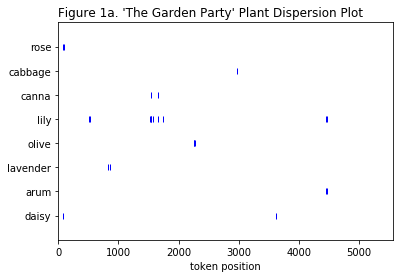

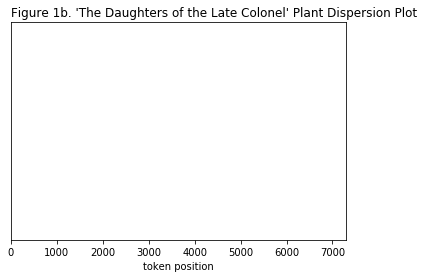

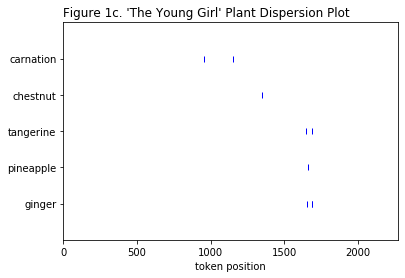

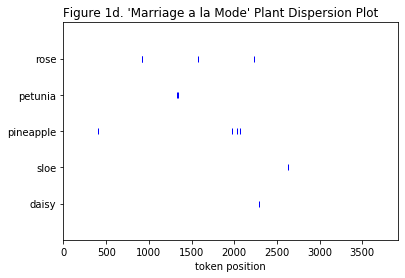

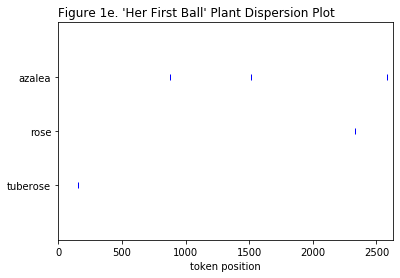

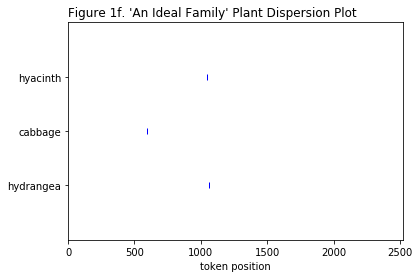

In [40]:
for i in np.arange(len(read)): 
    title = read[i]
    plant_dispersion_plot(title, i)

In [41]:
pdf_r.loc[:, (pdf_r != 0).any(axis=0)]

,title,n_tokens,n_types,n_plants,n_mentions,tangerine,cabbage,hydrangea,canna,hyacinth,...,sloe,lavender,pineapple,petunia,azalea,tuberose,chestnut,ginger,olive,lily
1,the garden party,5564,1377,8,25,0,1,0,2,0,...,0,2,0,0,0,0,0,0,2,10
2,the daughters of the late colonel,7283,1529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,the young girl,2275,762,5,9,2,0,0,0,0,...,0,0,1,0,0,0,1,3,0,0
6,marriage a la mode,3921,1162,5,16,0,0,0,0,0,...,1,0,6,2,0,0,0,0,0,0
9,her first ball,2631,865,3,5,0,0,0,0,0,...,0,0,0,0,3,1,0,0,0,0
13,an ideal family,2521,847,3,3,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Plant concordances 

In [42]:
# columns of plant dataframe that are actually plants 
flower_cols = [c for c in pdf_r.columns if not re.findall(r"n(?=\_)", c) and c != "title"]

In [43]:
def plant_concordance(title):
    t = title
    tokens = tokens_d.get(t)
    text = nltk.Text(tokens)
    index = pdf_r.loc[pdf_r.title.isin([t])].index[0]
    
#     print(f"Concordances for '{toc_d.get(t)}': ")
#     print("\n")
    
    concordances = plants_d.get(t)
    #print(concordances)
    for c in concordances:
        caps = "".join([l.upper() for l in c])
        print(f"Where the (plant) word '{caps}' appears in '{toc_d.get(t)}': ")
        text.concordance(c)
        print("\n")

In [44]:
# demo 
plant_concordance("an ideal family")

Where the (plant) word 'CABBAGE' appears in 'An Ideal Family': 
Displaying 1 of 1 matches:
opped dead under a group of ancient cabbage palms outside the Government buildi


Where the (plant) word 'HYACINTHS' appears in 'An Ideal Family': 
Displaying 1 of 1 matches:
floating outwards its blue jars of hyacinths on the broad sills On either side 


Where the (plant) word 'HYDRANGEAS' appears in 'An Ideal Family': 
Displaying 1 of 1 matches:
 side of the carriage porch their hydrangeas famous in the town were coming in




At a glance, these plant dispersion plots are surprisingly sparse. In fact, there are no mentions of plants at all in "The Daughters of the Late Colonel." Of the remaining stories, "An Ideal Family" was most reserved with only 3 types of plants, each mentioned one time each. On the other hand, "The Garden Party" had the most types of plants and the most mentions of plants, clocking in 8 and 25, respectively.  
 
It’s interesting to observe graphically exactly how rare mentions of plants are. In a way, the execution of these plant mentions is quite Modernist -- the few details that are underlined by authors emerge quite distinctly not only in the mind of the characters, but also of the reader’s. This effect is particularly visible in “An Ideal Family:” The three plant mentions are of hyacinths, hydrangeas, and cabbages. By looking at the concordances, I identify several important details: Firstly, “cabbage” actually refers to the “ancient cabbage palms outside the Government buildings” Mr. Neave stops under while musing about the absurdity of “Enjoying himself!”. My WordNet-Wikipedia approach correctly identified this token as a plant but somewhat incorrectly identified which token exactly was the plant of interest. Secondly, there are hints to what color the hyacinths are: The full quote is “\[Mr. Neave\] faced the big white-painted house, with its wide-open windows, its tulle curtains floating outwards, its blue jars of hyacinths on the broad sills.” This particular detail is important because Victorian floriography often assigned different means to the same flower based on shade. For example, the Greeks and consequently, the Victorians took red roses to symbolize romantic love because of the myth that all roses were white until Aphrodite’s mortal lover Adonis’ bled to death on them, staining them red forever. White roses, however, maintained their symbolism as signifiers of purity and innocence.  
 
Investigating the floriographic meanings behind palms, hyacinths, and hydrangeas yield additional insight into Mr. Neave. The appearance of palms, although not exactly a bouquet mainstay and therefore unlikely to be found in any flower dictionary, likely alludes to Palm Sunday, the day that marks Jesus’ triumphant return to Jerusalem and the beginning of Holy Week. According to Biblical myth, as Jesus approaches Jerusalem, he looks over the city and weeps (Luke 19:41), which foretells the coming Passion and the suffering caused by the eventual destruction of Herod’s Temple. These events directly parallel Mr. Neave’s internal turmoil: He is, by all appearances, a successful and victorious man returning to his home after a fulfilling and moral life. However, his journey home, though outwardly triumphant, forebodes unhappiness and upheaval.  
 
Mr. Neave then walks home and considers his home as it appears to his viewpoint on the street. The blue hyacinths he sees while gazing at his own home as an outsider represent constancy. In Greek mythology, the hyacinth first bloomed from the spilled blood of Hyacinthus (Encyclopedia Britannica, _Hyacinthus_ ), who was Apollo’s lover and accidentally killed. Apollo vowed to always remember Hyacinthus in his lyre music, and blue hyacinths thus represented his unwavering love and loyalty. In the same way, Mr. Neave has built his home up through constancy -- the invariable repetition of going to work every day, walking past the palms and up the hill to his house. Constancy has served Mr. Neave well and is what Mr. Neave craves, but it’s also precisely what he’ll be denied as he ages and his children demand he stop the routines that have sustained the family.  
 
Alongside the blue hyacinths in the windowsill of the Neave house are hydrangeas planted in the front garden. In Victorian times, hydrangea symbolized vanity and heartlessness because of the plant’s tendency to produce many flowers but very few seeds. Men accused women who rejected their romantic advances of frigidity by sending hydrangeas, and it was believed that women who grew hydrangeas would remain unmarried. This floriographic meaning is uncannily clear in “An Ideal Family”: Mr. Neave’s daughter “could have married anybody. But they had too good a time at home.” In fact, the whole Neave family embodies the vanity symbolized by hydrangeas: All superficial evidence points to their appearance as the eponymous ideal family, but underneath that veneer lay few seeds of true satisfaction.   
 
Finally, a plant that was not successfully identified by my WordNet-Wikipedia approach is the passion-vine. It droops “sorrowful, mournful, as though it understood” around Mr. Neave’s neck as he imagines the face of his wife as a young girl. The passion-vine was named for the Passion of Christ in the 16th century by Roman Catholic priests after its transport from the New World because of its flowers’ unusual shape (Stokes). The passion-vine’s flower has five petals and five petal-like sepals, which represented the ten apostles who remained faithful to Jesus throughout the Passion, and the circle formed by the flower’s hairlike rays represented the crown of thorns Jesus wore on the cross. In fact, the etymological origin of the word “passion” is the Latin verb “patior,” which means to suffer, bear, and endure -- exactly what Mr. Neave is going to have to do. Additionally, the Biblical Passion of Christ begins with his triumphal entry into Jerusalem, or the exact event to which the first plant mention in “An Ideal Family” alluded.   

Use computationally-aided close reading of the plants mentioned "An Ideal Family" reveals an interpretation of the story as a floriographically-concealed Christ narrative.  Instead of the conventional Christ figures, who perform miracles, fight for justice, or otherwise display divine qualities, Mr. Neave is a henpecked man past the prime of his life. Mansfield, in choosing to highlight palms, hyacinths, hydrangeas, and passionflower vines, paints the picture of a man who anticipates having to endure great resentment until his death. Hardly ideal, if you ask me.

## Figure 2. Color dispersion plots

In [45]:
# A FUNCTION THAT GRAPHS DISPERSION PLOTS FOR COLORS 
def color_dispersion_plot(title, fig_num):
    # title is the sthort story to graph 
    # returns a dispersion plot of colors
    
    %matplotlib inline
    
    story = stories_d.get(title)
    tokens = tokens_d.get(title)
    lemmas = lemmas_d.get(title)
    lemmas = [l.lower() for l in lemmas]
    text = nltk.Text(lemmas)
    
    
    # unique color-tokens that appear in story 
    colors_t = list(set(list(colors_d.get(title))))
    # unique color-lemmas that appear in story 
    colors_l = []
    for c in colors_t:
        colors_l.append(lemmatizer.lemmatize(c))
    colors_l = list(set(list(colors_l)))
    #print(colors_l)
    
    # find the corresponding mpl color to plot with according to the color lemma named 
    graph_colors = {}
    for l in colors_l:
        if l == "blackness": # account for failure to lemmatize
            graph_colors[l] = "black"
        elif l == "whiteness": # account for failure to lemmatize
            graph_colors[l] = "gray" # so you can still see a dot lol
        elif l == "yellow": # readability
            graph_colors[l] = "gold" 
        elif l == "amber": # mpl does not have an amber color
            graph_colors[l] = "darkgoldenrod"
        elif l == "scarlet": # mpl does not have an scarlet color
            graph_colors[l] = "firebrick"
        elif l in mpl_colors: 
            graph_colors[l] = l
    #print(graph_colors)
    
    # creating graph 
    # creating points to mark 
    points = [(x,y,graph_colors.get(colors_l[y])) for x in np.arange(len(lemmas)) 
              for y in np.arange(len(colors_l)) if lemmas[x] == colors_l[y]]
    if points:
        x,y,c = zip(*points)
    else: 
        x = y= ()
    
    for i in np.arange(len(x)):
        plt.plot([x[i]], [y[i]], marker = "o", c = c[i], linewidth = 3)
    #plt.plot(x, y, "rx", scalex=.1, color = "blue", c = "g")
    plt.yticks(range(len(colors_l)), colors_l, color="black")
    plt.ylim(-1, len(colors_l))
    plt.xlim(-5, len(tokens))
    
    #title 
    print_title = toc_d.get(title) # so it's not all boring and lowercase, but correctly formatted
    letter = string.ascii_lowercase[fig_num]
    
    plt.title(f"Figure 2{letter}. '{print_title}' Color Dispersion Plot", loc = "left")
    plt.xlabel("token position")
    plt.show()
    

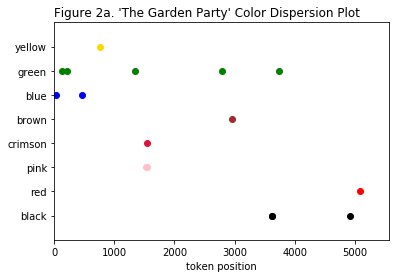

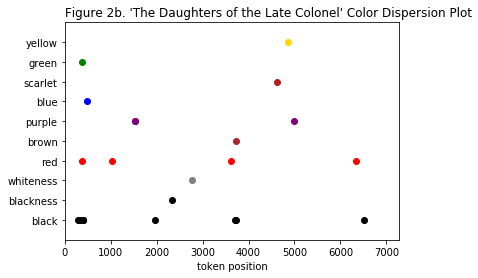

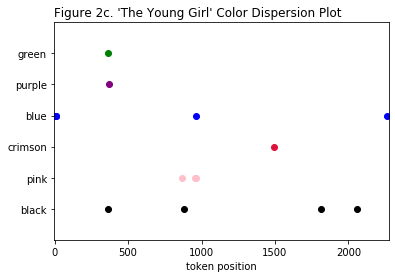

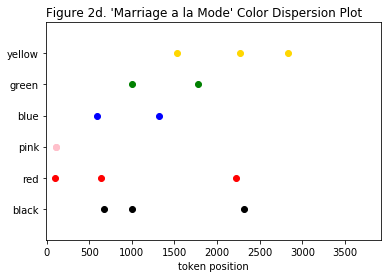

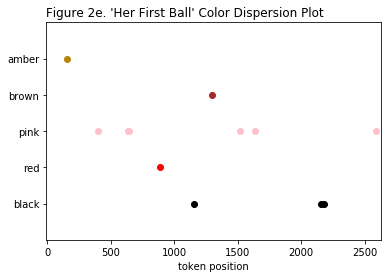

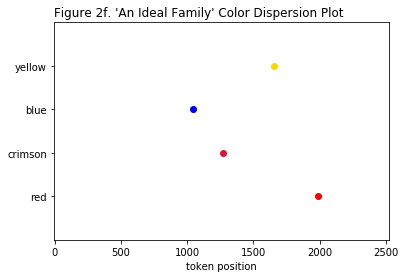

In [46]:
for i in np.arange(len(read)):
    t = read[i]
    color_dispersion_plot(t, i)

## Color concordances 

In [47]:
# columns of plant dataframe that are actually plants 
color_cols = [c for c in cdf_r.columns if not re.findall(r"n(?=\_)", c) and c != "title"]

In [48]:
def color_concordance(title):
    t = title
    tokens = tokens_d.get(t)
    text = nltk.Text(tokens)
    index = cdf_r.loc[cdf_r.title.isin([t])].index[0]
    
#     print(f"Concordances for '{toc_d.get(t)}': ")
#     print("\n")
    
    concordances = list(set(colors_d.get(t)))
    #print(concordances)
    for c in concordances:
        caps = "".join([l.upper() for l in c])
        print(f"Where the (color) word '{caps}' appears in '{toc_d.get(t)}': ")
        text.concordance(c)
        print("\n")

In [49]:
color_concordance("the daughters of the late colonel")

Where the (color) word 'BLACK' appears in 'The Daughters of the Late Colonel': 
Displaying 10 of 10 matches:
have our dressing gowns dyed as well Black almost shrieked Josephine Well what 
 seem quite sincere in a way to wear black out of doors and when we re fully dr
nite green ones which went with hers Black Two black dressing gowns and two pai
 ones which went with hers Black Two black dressing gowns and two pairs of blac
lack dressing gowns and two pairs of black woolly slippers creeping off to the 
rs creeping off to the bathroom like black cats I don t think it s absolutely n
said Mr Farolles got up and took his black straw hat from the round table And a
 Only runners Both paused to watch a black man in white linen drawers running t
aper parcel in his hands Josephine s black man was tiny he scurried along glist
rings shaped like tiny pagodas and a black feather boa Why did the photographs 


Where the (color) word 'BLACKNESS' appears in 'The Daughters of the Late Colonel': 
Displ

From observation of the color dispersion plots, Mansfield uses distinct color palettes between each story. For instance, “The Garden Party” and “The Daughters of the Late Colonel” both use color generously -- they name 8 and 10 distinct colors and mention colors 15 and 21 times, respectively. Although there are numerous colors mentioned in both stories, the composition of each works' color palettes is quite distinct: “The Garden Party” is relatively riotous in its use of the complete visual spectrum, whereas “The Daughters of the Late Colonel,” is a much more muted story.  

There are 11 mentions of black or blackness to “The Garden Party’s” 3 mentions, even though death informs both stories. There is only one mention of blue and green each in “The Daughters of the Late Colonel,” which characterize the story as taking place firmly indoors. In fact, the hues of “The Daughters of the Late Colonel” is not joyful but unsettling: Four instances of red or scarlet refer to embarrassment, chapped skin, “a square of sunlight” on Indian carpet (which could represent how restricted Jug and Con’s lives have become, given that even the sun is confined to its square), and Cyril’s observation that his “Aunt Josephine went scarlet with pleasure.” The three instances of purple all refer to anger and ill health -- the late Colonel lays on his deathbed “purple, a dark angry purple in the face,” and his father, Grandfather Pinner, has a hand like a “purple meringue-shell.” The remaining instances, one each of blue, red, green, and yellow refer to sorrow or items beyond Jug and Con’s reach. Jug cries “light-blue tear\[s\]” writing thank-you letters to people who have written with condolences, while Jug’s red slippers, Con’s green slippers, and Grandfather Pinner’s “beautiful pale yellow silk handkerchief” are all status items prohibited to the girls because of their social status as grieving and unmarried women.   

Black grief and mourning, red emotional volatility, and purple anger speckled with colorful hints of the life Jug and Con cannot have form the visual backdrop of the lives of the daughter of the late Colonel.  


# Conclusion 

Katherine Mansfield incorporated Victorian floriography and Impressionist visual art into her work to add meaning. Mentions of certain plants and colors allowed Mansfield to allude to literary tradition or more thoroughly illustrate her characters' emotional landscapes. 

In "An Ideal Family," Mansfield conceals an end-of-life Christ allegory through her use of Biblical and Victorian flora. She draws parallels between the aging Mr. Neave and Jesus Christ in the week before his crucifixion. In "The Daughters of the Late Colonel," Mansfield uses color to demonstrate how deprived and restricted Josephine and Constantia are. The story is dominated by muted, dark shades such as black, red, and purple that connote strong negative emotions, and the brief glimpses of color that do emerge are associated with experiences the daughters, as mourning spinsters, are barred from. 


# Works Cited 
NOTE that all quotes that are not explicitly cited are from Katherine Mansfield's _The Garden Party and Other Stories._ There are no page numbers because I never bought a paper copy. 


Forward, Stephanie. "An Introduction to Katherine Mansfield's Short Stories." _British Library._ May 25, 2016. https://www.bl.uk/20th-century-literature/articles/an-introduction-to-katherine-mansfields-short-stories

"Hyacinthus." _Encyclopedia Britannica_., November 08, 2007. https://www.britannica.com/topic/Hyacinthus  



"Katherine Mansfield." _Encyclopedia Britannica_., January 05, 2020. https://www.britannica.com/biography/Katherine-Mansfield  

"Plant Symbolism." _Wikipedia._ https://en.wikipedia.org/wiki/Plant_symbolism  

Saker, Nicola. "A Bouquet for Katherine Mansfield." _Katherine Mansfield House and Garden._ September 21, 2015. https://www.katherinemansfield.com/article/a-bouquet-for-mansfield  

Stokes, Jr., John. "The Passion Flower." _University of Dayton._ 1996. https://udayton.edu/imri/mary/p/passion-flower.php#:~:text=The%20Passion%20Flower%20with%20its,crowning%20with%20thorns%20and%20crucifixion.